## Quiz

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv') #read csv file

### What percentage of passengers in Titanic embarked at C?

In [2]:
passengers_at_c = sum(df['Embarked'] == 'C')
len(df.dropna())
# passengers = df.shape[0]

# passengers_at_c / passengers * 100

183

### What percent of female passengers in Titanic embarked at C?

In [3]:
females_at_c = len(df[(df['Sex'] == 'female') & (df['Embarked'] == 'C')])
females = len(df[(df['Sex'] == 'female')])
females_at_c / females * 100

23.248407643312103


## An Introduction to Descriptive Statistics
At this point in our course, we've had plenty of time, experience, and practice in manipulating our data.

However, to really understand our data and underlying patterns across it, we need to dive a layer deeper into the mathematics behind data mechanics and dynamics.

In order to be able to draw conclusions from our data, we need to be able to describe and interpret our data.

This will become essential for more advanced data science concepts in data visualization, machine learning, and deep learning.

### Measures of Central Tendency
A Central Tendency is a central (typical) value for a probability distribution

In statistics, we often find that describing data by averages allows us to more often make more powerful assertions regarding the data as a whole.

We often **use three key measures of central tendency** to help describe the **centroid** (arithmetic mean trend across a distribution) of our data:

- Mean
- Median
- Mode

#### The mean is the raw average value across our data.
Calculating the mean is simple: compute the sum of all values across our data and divide by the total number of values in our dataset.

We've been using the mean for years and years, but such a surprisingly simple arithmetic calculation turns out to have massive implications across being able to critically understand and break down complex datasets!



In [4]:
import numpy as np

data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the average value of our dataset.
def compute_mean(dataset):
    """ Main function that calculates the average value across our data. """
    
    return sum(dataset)/len(dataset)

compute_mean(data)


4.391304347826087

### What is the average age of male passengers that survived?

In [5]:
# Solutions:    
print(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].mean())

# or

print(compute_mean(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].dropna().values)) #using our method which takes a dataset

# or

print(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].dropna().agg(compute_mean)) #panda's aggregation method

27.276021505376345
27.276021505376345
27.276021505376345


## The median is the "middle value" or midpoint across our data.
Determining the median is as simple as it sounds: find the data value lying in the exact middle of our dataset.

One critical exception occurs when our data has an even number of values and thus has two values at its center: in these cases, find the mean value of the two medians to obtain the true median across our data.

**Remember**: the median can only be calculated across sorted data!
If data is distributed in a non-normal manner, then we can learn a great deal from interpreting what the exact median value of our dataset is.

### Activity: Write a function to compute the median from an arbitrary dataset.

In [6]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the exact true median value of our dataset.
# HINT: Consider using DataFrame slicing to help with identifying the correct median value(s).
def compute_median(dataset):
    """ Main function that determines the median value across our data. """
    count = len(dataset)
    sorted_data = np.sort(dataset) #sort data
    if count < 1:
        print("Dataset is < 1")
        return None
    if count % 2 == 1: #if odd... get middle
        return sorted_data[int((count-1)/2)]
    else: #if even... get the average of the 2 middle elements
        return (sorted_data[int(count/2)] + sorted_data[int(count / 2)-1]) / 2
    
compute_median(data)

4

## The mode is the most commonly occurring value or feature across our data.

Determining the mode is relatively simple: find the value that occurs most frequently across our data.

Remember that if all values across our data are unique and only occur once, then our data has no mode!

The mode is also an interesting measure of central tendency in that it can be applied towards categorical (non-numerical) data; one can find frequently occurring categories without running any calculations.

### Activity: Write a function to compute the mode from an arbitrary dataset.

In [7]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0,5,5,5,5, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])
def compute_mode(dataset):
    """ Main function that determines the mode value across our data. """
    d={}
    for num in dataset:
        word_count = d.get(num, 0) + 1 #get the count from dictionary, default value is 0, and increment by 1
        d[num] = word_count
    return max(d, key=d.get) #get the element with the maximum count
compute_mode(data)

5

## #Create a dictionary from array

In [8]:
dict(pd.Series(data).value_counts())

{5: 6, 3: 5, 7: 3, 0: 3, 10: 2, 4: 2, 1: 2, 9: 1, 8: 1, 6: 1, 2: 1}

## Measures of Spread and Variance
Like our friends in the central tendency community, measures of spread and variance do their best to **describe patterns across our data as a whole.**
However, unlike measures of ***central tendency***, *which focus on the distribution of our data towards an arithmetic centroid*, **measures of spread and variance talk about the shape and layout of our data all across the board**!
In this course, there are two key measures of spread and variance to help describe the shape of our data:
- **Range**
- **Variance, Standard Deviation**

## What is Range?
Range is the **difference between the highest and lowest values in a data set**. It is one of the simplest measures of spread (the extent to which a distribution is stretched or squeezed). We'll use variance/standard deviation to help give more information around all of this!

## What is standard deviation or variance?
We measured the number of rainy days during Fall in three different cities in the last 5 years:

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Rainy':[29,28,32,35,36,12,18,30,45,55, 32,32,32,32,32], 'City':['City_A']*5 + ['City_B']*5 + ['City_C']*5})
df

,Rainy,City
0,29,City_A
1,28,City_A
2,32,City_A
3,35,City_A
4,36,City_A
5,12,City_B
6,18,City_B
7,30,City_B
8,45,City_B
9,55,City_B


### What is the mean of rainy days for City A, B and C?

In [10]:
print(np.mean(df[df['City'] == 'City_A']['Rainy']))

print(np.mean(df[df['City'] == 'City_B']['Rainy']))

print(np.mean(df[df['City'] == 'City_C']['Rainy']))

32.0
32.0
32.0


### Which city has more variation?
Standard deviation (std), which is the **square root of variance**, can capture the variations in different arrays

In [11]:
print(np.std(df[df['City'] == 'City_A']['Rainy']))

print(np.std(df[df['City'] == 'City_B']['Rainy']))

print(np.std(df[df['City'] == 'City_C']['Rainy']))

3.1622776601683795
16.112107248898266
0.0


#### Let's plot the variations in the data

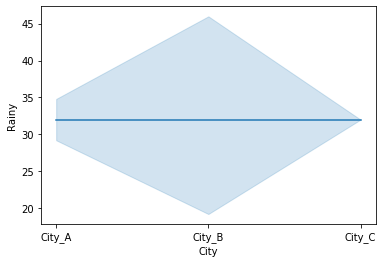

In [12]:
sns.lineplot(y='Rainy', x='City', data=df)
plt.show()

### Most (or majority) of the values (rainy days) in Cities A, B and C are between
**(mean - std) and (mean + std)**

In [13]:
print([32 - np.std(df[df['City'] == 'City_A']['Rainy']), 32 + np.std(df[df['City'] == 'City_A']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_B']['Rainy']), 32 + np.std(df[df['City'] == 'City_B']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_C']['Rainy']), 32 + np.std(df[df['City'] == 'City_C']['Rainy'])])

[28.837722339831622, 35.16227766016838]
[15.887892751101734, 48.11210724889827]
[32.0, 32.0]


## Percentile
### Activity - Compute 75% Percentile for Fare in Titanic
- At which dollar amount did 75 percent of the passengers pay less than the Fare amount?

In [14]:
import pandas as pd
df = pd.read_csv('titanic.csv')

ls_fare = df['Fare'].dropna().values

np.percentile(ls_fare, 75)

31.0

### Verify that 75 percent of passengers paid less than 31.0 Dollar

In [15]:
# Slice the data based on Fare for those paid less than 31 Dollar
numbers_below_percentile = df[df['Fare'] <= np.percentile(ls_fare, 75)]

# Compute the size of the sliced dataframe and divide over all number of passengers
pr_below_percentile = len(numbers_below_percentile)/len(ls_fare)

pr_below_percentile

0.7508417508417509

# Day 6: Applied Probability to data frame
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/Applied_Probability.ipynb

### What is the probability (chance) that a passenger in Titanic be female?

In [28]:
# Unconditional Probability
prob_of_females = len(df[df['Sex'] == 'female']) / len(df['Sex'].dropna())
prob_of_females

0.35241301907968575

## Baye's Rule

P(B|A) = P(A and B) / P(A)

### Given that some passengers paid over $100 for their ticket, what is the chance they survived?
- P(survived=1 | Fare > 100)
- Bayesian rule -> P(survived=1 and Fare > 100)/P(Fare>100)

In [29]:
# Conditional Probability - limit our search space
df[df['Fare'] > 100]['Survived'].value_counts()

1    39
0    14
Name: Survived, dtype: int64

In [49]:
who_paid_over_100 = df[df['Fare'] > 100]
survived_and_paid_over_100 = df[ (df['Fare'] > 100) & (df['Survived'] == 1)]
P_numerator = len(survived_and_paid_over_100) / len(df)
P_denominator = len(df[df['Fare'] >= 100]) / (len(df))
print(f"{P_numerator} / {P_denominator} = {P_numerator/P_denominator}")


0.04377104377104377 / 0.05948372615039282 = 0.7358490566037736


### What is the probability that a survived passenger was male

In [59]:
survivors = df[df['Survived'] == 1]
male_survivors = df[ (df['Sex'] == "male") & (df['Survived'] == 1)]
len(male_survivors) / len(survivors)

0.31871345029239767

### Given that a passenger iis under 30 but over 20 years old, what are the chances they are in first class?

### Given that a male passenger over 30 years old did not survive, what are the odds that he paid less than $25 for a ticket?

### Tennis Dataset

In [61]:
import pandas as pd

df = pd.read_csv('tennis.txt', delimiter="\t", header=None, names=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])
df

,Outlook,Temp,Humidity,Wind,Decision
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,Cool,Normal,Weak,Yes
6,Rain,Cool,Normal,Strong,No
7,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Mild,High,Weak,No
9,Sunny,Cool,Normal,Weak,Yes
10,Rain,Mild,Normal,Weak,Yes


### What is the probability that a Tennis player plays when Wind is Weak?
- Formula is P("Wind"="Weak" & "Decision"="Yes") / P("Wind"="Weak")

In [72]:
# played = df[df['Decision'] == "Yes"] #should not be the denominator
P_weak_wind = df[df['Wind'] == "Weak"]
played_in_weak_windy = df[ (df['Wind'] == "Weak") & (df['Decision'] == "Yes")]
len(played_in_weak_windy) / len(P_weak_wind)

0.75

In [98]:
#method that takes a Column name and that column's value, and return conditional probabililty of column2
def conditional_prob(df, column1, value1, column2):
    probabilities = {}
    column1_is_value1 = df[df[column1] == value1]
    column2_values = set(df[column2].values) #possible values for target_column
    for column2_value in column2_values: #for each value in target's values
        probabilities[column2_value] = len(df[ (df[column1] == value1) & (df[column2] == column2_value)]) / len(column1_is_value1)
    return probabilities

print(conditional_prob(df, "Wind", "Weak","Decision"))

{'Yes': 0.75, 'No': 0.25}


# Day 8: PDF, CDF, and Normal Distribution
https://github.com/Make-School-Courses/DS-1.1-Data-Analysis/blob/master/Notebooks/PDF_CDF_Normal.ipynb

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns

df = pd.read_csv('titanic.csv')

## PDF

### Plot the age distribution

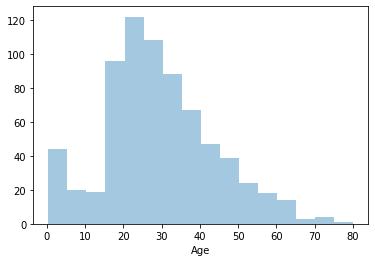

In [9]:
ls_age = df['Age'].dropna()
sns.distplot(ls_age, hist=True, kde=False, bins=16)

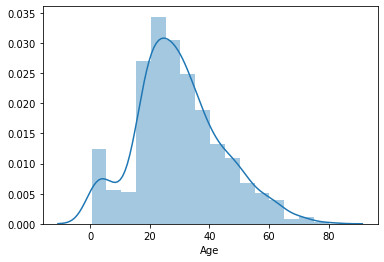

In [10]:
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16) #kde plots the pdf of the list

### What is the probability that a passenger in ls_age is 20-25 years old?

In [34]:
ls_age = df['Age'].dropna()
total_passengers = len(ls_age)
pass_20_to_25 = df[(df["Age"] > 20) & (df["Age"] <= 25)]
area = len(pass_20_to_25)/714
w=5
wh = len(pass_20_to_25)/714
h=len(pass_20_to_25)/714/5
h


0.03417366946778712

### What percentage of passenger is younger than 40?

In [30]:
list_younger_40 = df[df['Age'] < 40]
prob_below_40 = len(list_younger_40)/len(ls_age)
prob_below_40

0.7717086834733894

## Cumulative Density Function (CDF)
	•	In above example, we could not easily obtain the percentage from a PDF, although it is possible. 
	•	This is much easier if we use a CDF. A CDF calculates the probability that a random variable is less than a threshold value
	•	Let's learn CDF by example: given an array of numbers (our random variable) and a threshold value as input:
    
	1.	Find the minimum value in the array
	2.	Set the threshold to be the minimum value of the array
	3.	For a given array of numbers and a given threshold, count all of the elements in the array that are less than the threshold, and divide that count by the length of the array
	4.	Repeat step three, increasing the threshold by one, until you go through step three where threshold is equail to the maximum value in the array

### 1. Write a function that counts how many elements in a give list (e.g. age) is lower than threshold

In [41]:
#return elements in ls <= threshold
def count_lower(ls, threshold):
    less_than_threshold_list = []
    for val in ls:
        if val <= threshold:
            less_than_threshold_list.append(val)
    
    return len(less_than_threshold_list) / len(ls)

count_lower(df['Age'].dropna().values, 40)

0.7899159663865546

### 2. Change the threshold from minimum value of age to maximum value of age with defined step_size

In [52]:
# def cdf_list(ls, step_size):
#     threshold_range = range(min(ls), max(ls), step_size) #range(start, stop, step)
#     #iterate through threshold_range and call your first function
# #     for val in threshold_range:
#     count_lower()
        
# cdf_list(ls_age, 1)

In [53]:
ls_age = df['Age'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

# Create an array cdf_age where each value is the cdf of the age for each threshold
cdf_age = []
#get min value in array
min_val = np.min(ls_age)
#set threshold to be the min value of the array
threshold = np.min(ls_age)
#for a given array of numbers and a given threshold
for r in range(int(np.min(ls_age)), int(np.max(ls_age))):
    #count all of the elements in the array that are less than the threshold
    less_than_threshold = calculate_cdf(ls_age, r)
    age_value = less_than_threshold / len(ls_age)
    cdf_age.append(age_value)
    #repeat, increasing the threshold by one until the threshold is equal to the max value in array
print(cdf_age)


[0.0, 0.0196078431372549, 0.03361344537815126, 0.04201680672268908, 0.056022408963585436, 0.06162464985994398, 0.06582633053221289, 0.0700280112044818, 0.07563025210084033, 0.08683473389355742, 0.0896358543417367, 0.09523809523809523, 0.09663865546218488, 0.09943977591036414, 0.10784313725490197, 0.11624649859943978, 0.1400560224089636, 0.15826330532212884, 0.19467787114845939, 0.22969187675070027, 0.2507002801120448, 0.2857142857142857, 0.3235294117647059, 0.3445378151260504, 0.38795518207282914, 0.4215686274509804, 0.44677871148459386, 0.47198879551820727, 0.5070028011204482, 0.5378151260504201, 0.572829131652661, 0.5994397759103641, 0.6246498599439776, 0.6484593837535014, 0.6694677871148459, 0.696078431372549, 0.726890756302521, 0.7366946778711485, 0.7521008403361344, 0.7717086834733894, 0.7899159663865546, 0.8011204481792717, 0.819327731092437, 0.8263305322128851, 0.8389355742296919, 0.8557422969187675, 0.8627450980392157, 0.8753501400560224, 0.8879551820728291, 0.896358543417367, 

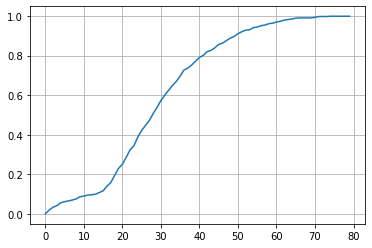

In [55]:
import matplotlib.pyplot as plt

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)
plt.grid()
#now we can tell than 80% of passengers are less than 40 years old

In [56]:
# ls_age = df['Age'].dropna().values

# def calculate_cdf(x, threshold):
#     return np.sum(x <= threshold)

# # Create an array cdf_age where each value is the cdf of the age for each threshold
# cdf_age = [calculate_cdf(ls_age, r)/len(ls_age) for r in range(int(np.min(ls_age)), int(np.max(ls_age)))]

# print(cdf_age)

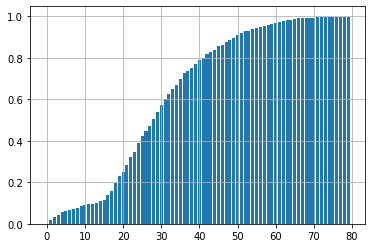

In [60]:
plt.bar(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)
plt.grid()

### More about PDFs
Below we show a Violin plot. Per Wikipedia, a violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.

Violin plots are similar to box plots, except that they also show the probability density (what a PDF shows!) of the data at different values, usually smoothed by a kernel density estimator.

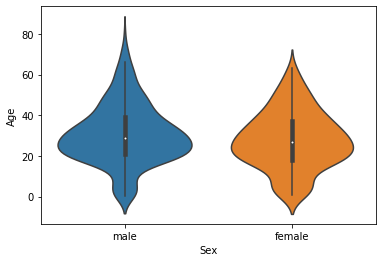

In [57]:
sns.violinplot(x="Sex", y="Age", data=df)
#Observations are many male and female are 20-40, and there are older male

## Normal Distribution
	•	It is possible that when we plot a histogram or PDF of an array, it has a Bell Shape 
	•	The name of this histogram is Normal

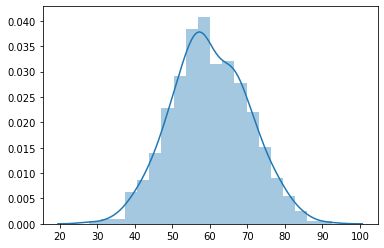

In [63]:
import numpy as np
import seaborn as sns

# Generate 1000 samples with 60 as its mean and 10 as its std, and 1000 elements
a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20)

#### Activity:
The instructor of DS graded last term's final exam. They are reporting that the mean was 60 (with scale of 100) with standard deviation of 10.
What is the probability that students got more than 70?

In [79]:
from scipy.stats import norm

#first parameter = mean
#loc = mean
#scale = std

print(norm.sf(70, loc=60, scale=10))

# or

print("Probability of students that got more than 70 =", 1 - norm.cdf(70, loc=60, scale=10)) #greater than 70
print("Probability of students that got less than 70 =", norm.cdf(70, loc=60, scale=10)) #less than 70

0.15865525393145707
Probability of students that got more than 70 = 0.15865525393145707
Probability of students that got less than 70 = 0.8413447460685429


This area we just calculated is called the *survival*

### Normal Distribution Properties
When the data is Normally distributed:
- 68% of the data is captured within one standard deviation from the mean.
- 95% of the data is captured within two standard deviations from the mean.
- 99.7% of the data is captured within three standard deviations from the mean.

#### Show that about 68% of the values are in the [50, 70] range

In [83]:
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10) #subtract bigger CDF of 70 by CDF of 50

0.6826894921370859

In [84]:
#OR
sum(50 < elm < 70 for elm in a) / len(a)

0.71

### Scaling the Normal Distribution
**Unit std** means you are converting your data from its original units to units of standard deviation

We can take any list of values which are normally distribute and apply simple arithmetic on the list such that the mean is 0 and the standard deviation is 1 for our new transformed list. We can do this through the following steps below:
- For each of the values in the list, we will need to *subtract the mean of list frm the value, and divide this difference by the standard deviation*

Let's walk through this using the DS final exam data and normally distributing it

Mean= -0.07086081599346779
STD= 1.0211473772503652
Another way= 0.678


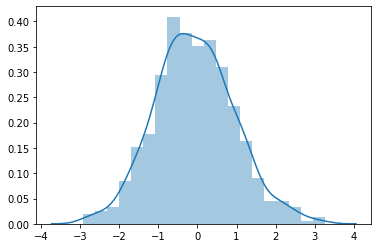

In [94]:
# our list of exam scores with mean=60, and std=10, and 1000 elements
exam_scores = np.random.normal(60,10,1000)

normalized_scores = []
for score in exam_scores:
    #subtract the mean of list from the value, and divide this difference by the standard deviation
    normal_score = (score - 60) / 10
    normalized_scores.append(normal_score)

sns.distplot(normalized_scores, hist=True, kde=True, bins=20)
print("Mean=", np.mean(normalized_scores))
print("STD=", np.std(normalized_scores, ddof=1)) #ddof means "when denominator is n-1"

print("Another way=", sum(50 < elm < 70 for elm in exam_scores) / len(exam_scores)) #students that got more than 50 and less than 70

In [88]:
sum(50 < elm < 70 for elm in exam_scores) / len(exam_scores)

0.663